In [ ]:
from common.util import im2col
import sys, os
import numpy as np
class Convolution:
    def __init__(self,W,b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN,C,FH,FW = self.W.shape  #卷积核的个数，通道数，高，宽
        N,C,H,W = x.shape
        out_h=int(1+(H+2*self.pad-FH)/self.stride)
        out_w=int(1+(W+2*self.pad-FW)/self.stride)
        
        col=im2col(x,FH,FW,self.stride,self.pad)
        # 将卷积核权重 W 展平为二维矩阵形式，形状为 (C * FH * FW, FN)。
        # .T 表示转置，方便后续矩阵乘法。
        col_W=self.W.reshape(FN,-1).T
        out=np.dot(col,col_W)+self.b
        
        # 将 out 从 (N * out_h * out_w, FN) 转换为 (N, out_h, out_w, FN)。
        out=out.reshape(N,out_h,out_w,-1).transpose(0,3,1,2)
        
        return out
        

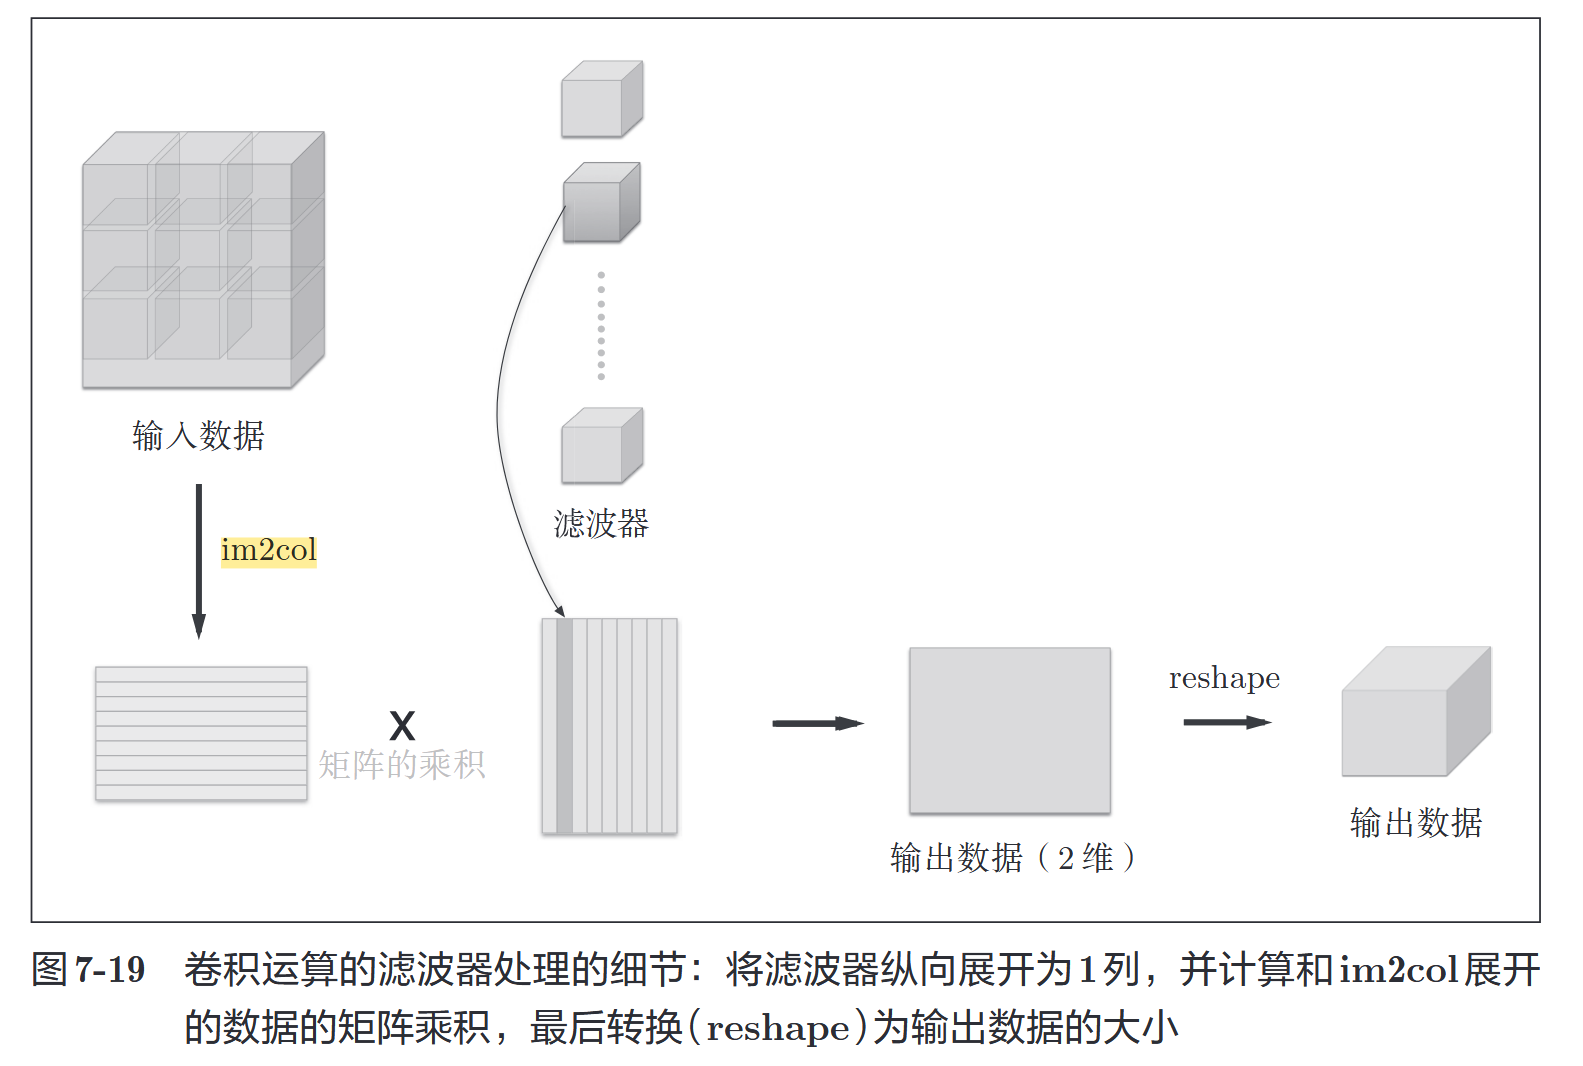


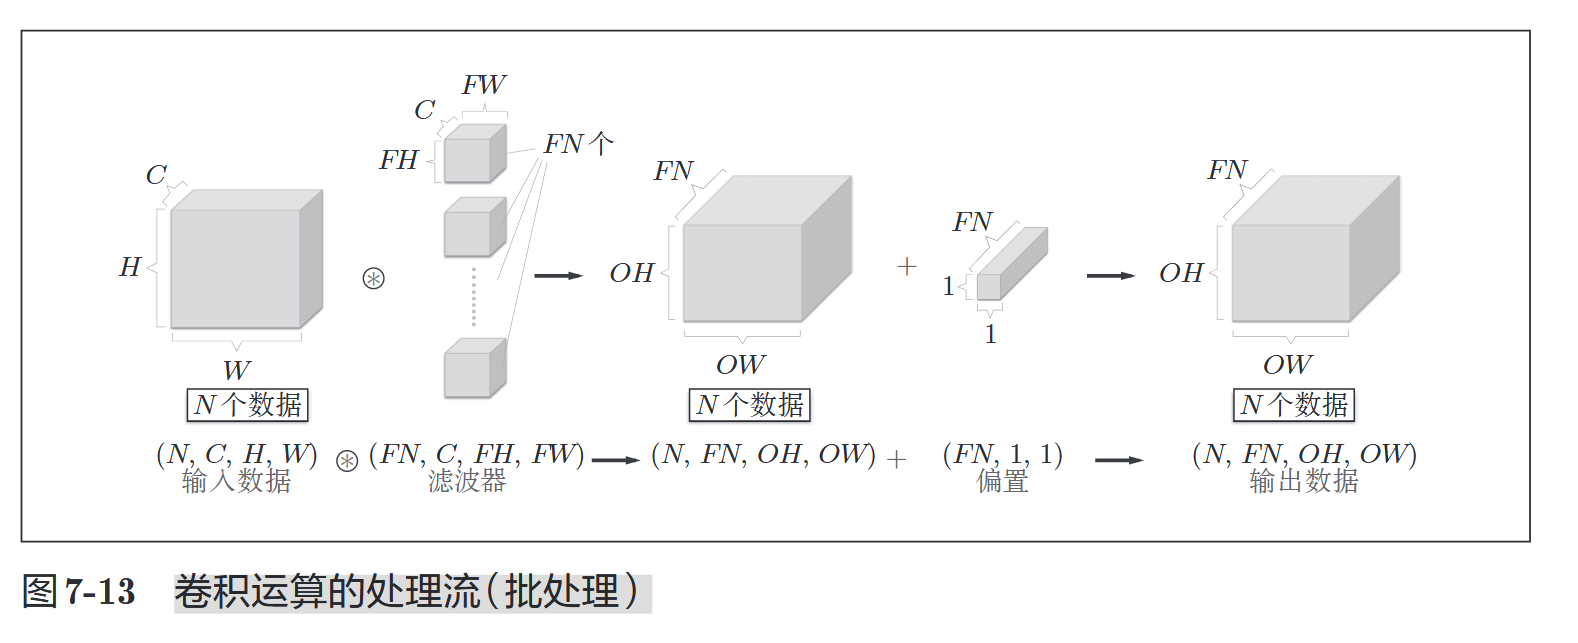

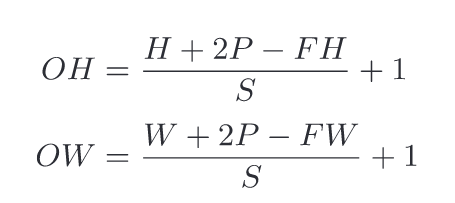